In [8]:
from scipy import misc
from scipy.signal import decimate, resample
import numpy as np
import utils

import matplotlib.pyplot as plt

%matplotlib inline

In [10]:
calBlue = misc.imread('images/marconi.tiff')

In [11]:
print calBlue.shape

(1000, 800, 3)


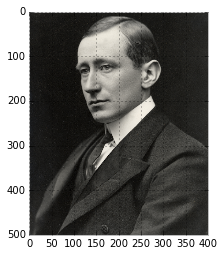

In [12]:
plt.imshow(calBlue[::2,::2,:])

In [13]:
calBlue_R = calBlue[:,:,0]
calBlue_G = calBlue[:,:,1]
calBlue_B = calBlue[:,:,2]

calBlue_decimated = np.zeros((calBlue.shape[0]/2, calBlue.shape[1]/2, 3))

calBlue_decimated[:,:,0] = decimate(decimate(calBlue_R, 2, axis=0), 2, axis=1)
calBlue_decimated[:,:,1] = decimate(decimate(calBlue_G, 2, axis=0), 2, axis=1)
calBlue_decimated[:,:,2] = decimate(decimate(calBlue_B, 2, axis=0), 2, axis=1)

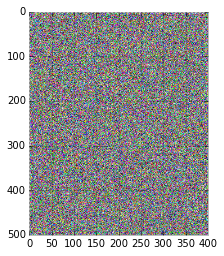

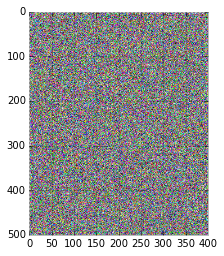

In [14]:
plt.imshow(calBlue_decimated); plt.show()
plt.imshow(decimate(decimate(calBlue, 2, axis=0), 2, axis=1)); plt.show()

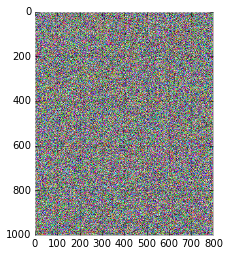

In [15]:
plt.imshow(resample(resample(calBlue_decimated, calBlue.shape[0], axis=0), calBlue.shape[1], axis=1))

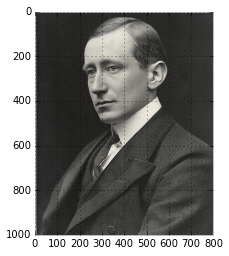

In [16]:
plt.imshow(misc.imresize(calBlue_decimated, calBlue.shape))

(1000, 800, 3)
(62, 50, 3)
3100
(1000, 800, 3)
25.3032004487


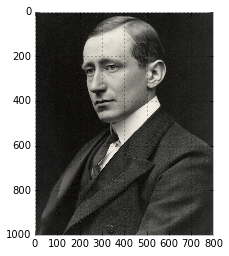

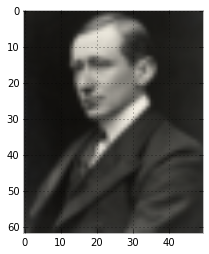

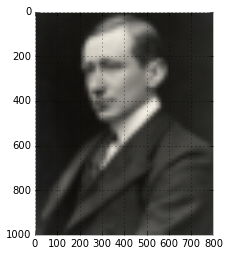

1


In [21]:
# calBlue_ds = misc.imresize(calBlue, (calBlue.shape[0]/4, calBlue.shape[1]/4))
calBlue_ds = utils.downsample(calBlue, 16)
calBlue_res = utils.upsample(calBlue_ds, calBlue.shape)

print calBlue.shape
print calBlue_ds.shape
print calBlue_ds.size/3
print calBlue_res.shape

print utils.psnr(calBlue, calBlue_res)

plt.imshow(calBlue); plt.show()
plt.imshow(calBlue_ds); plt.show()
plt.imshow(calBlue_res); plt.show()

print 1